Lecture 1 (practice)
======================


## About

During this part of the assignment, you will gain experience working with different datasets. These datasets are diverse and should provide you with examples of how to work with various sources of data.

* **CIFAR-10**: This is a 'classic' dataset for Computer Vision. The CIFAR-10 dataset consists of 60,000 32x32 color images across 10 classes, with 6,000 images per class. There are 50,000 training images and 10,000 test images.

* **DTD**: The DTD is a texture database consisting of 5,640 images, organized according to a list of 47 terms (categories) inspired by human perception. There are 120 images for each category. Image sizes range between 300x300 and 640x640, and the images contain at least 90% of the surface area representing the category attribute.

* **COCO-O**: COCO-O (Out-of-distribution) contains six domains (sketch, cartoon, painting, weather, handmade, tattoo) of COCO objects, which are challenging to detect for most existing detectors. The dataset includes a total of 6,782 images. It is primarily a dataset for object detection, but during this assignment, we will treat it as a classification dataset.

For CIFAR-10, we will use the native PyTorch dataset structure; for DTD, the Hugging Face dataset library will be used, and for COCO-O, the process will be done manually.

<hr>

* The <b><font color="red">red</font></b> color indicates the task that should be done, like <b><font color="red">[TODO]</font></b>: ...
* Addicitional comments, hints are in <b><font color="blue">blue</font></b>. For example <b><font color="blue">[HINT]</font></b>: ...

## Prelimiaries

In [1]:
!pip install datasets
!pip install fiftyone

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 124.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.3/112.3 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.4/112.4 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.8/74.8 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 136.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 99.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.7/308.7 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 934.3/934.3 kB 67.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 14.2 MB/s eta

In [34]:
import os
import gdown
import zipfile

import random
from PIL import Image
import matplotlib.pyplot as plt

from torchvision import datasets, transforms
from datasets import load_dataset # HuggingFace dedicated lib

import fiftyone as fo

import json
from collections import Counter, defaultdict
import numpy as np

## Auxilary functions

In [3]:
def plot_images_with_labels(images: list[Image.Image], labels: list[str], num_cols: int = 3, fig_size: float = 2) -> None:
    """Plot a grid of images with their corresponding labels."""
    num_images = len(images)
    num_rows = (num_images + num_cols - 1) // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(fig_size * num_rows, fig_size * num_rows))
    axes = axes.flatten()

    for i, (img, label) in enumerate(zip(images, labels)):
        if isinstance(img, Image.Image):
            axes[i].imshow(img)
        else:
            axes[i].imshow(img, cmap='gray')
        axes[i].set_title(label)
        axes[i].axis('off')  # Turn off axis

    for i in range(num_images, len(axes)):
        axes[i].axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

## Load data

In [4]:
# Set the local folder with the data
path_data = "./data"
os.makedirs(path_data, exist_ok=True)

### CIFAR10

In [5]:
# Load the data using torchvision 'datasets'
cifar10_dataset_train = datasets.CIFAR10(root=path_data, train=True, download=True, transform=None)
cifar10_dataset_test = datasets.CIFAR10(root=path_data, train=False, download=True, transform=None)

100%|██████████| 170M/170M [00:03<00:00, 42.6MB/s]


In [6]:
# Let's have a look what we have loaded
print(cifar10_dataset_train)
print(cifar10_dataset_test)
print()
print(type(cifar10_dataset_train))

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./data
    Split: Test

<class 'torchvision.datasets.cifar.CIFAR10'>


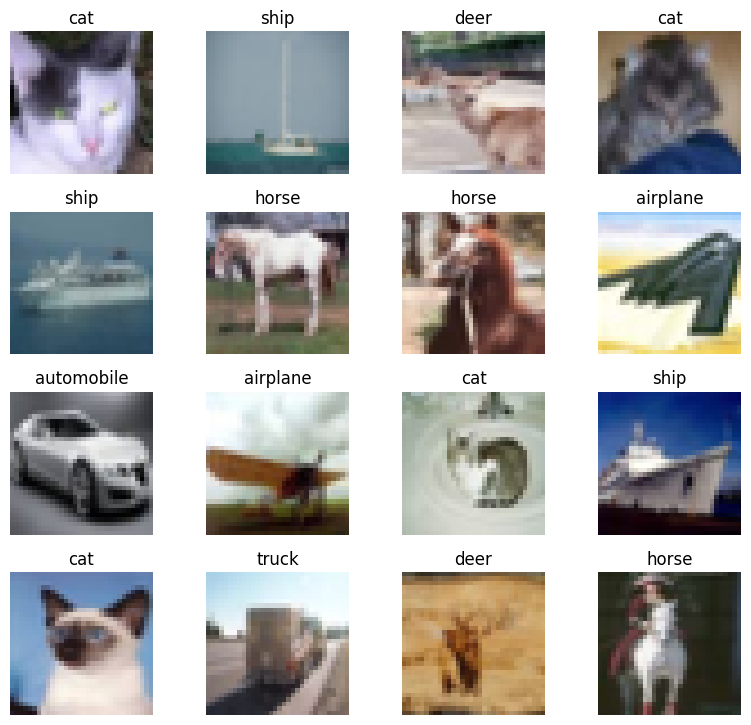

In [7]:
# Fast look at some random images
n = 16

random_indexes = random.sample(range(len(cifar10_dataset_train)), n)
random_elements = [cifar10_dataset_train[indx] for indx in random_indexes]

images, targets = zip(*random_elements)
labels = [cifar10_dataset_train.classes[target] for target in targets]
plot_images_with_labels(images, labels, num_cols=4)

### DTD dataset

In [8]:
# Let's load using HuggingFace
dtd_dataset = load_dataset("tanganke/dtd", cache_dir=path_data)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

data/train-00000-of-00001.parquet:   0%|          | 0.00/450M [00:00<?, ?B/s]

data/test-00000-of-00001.parquet:   0%|          | 0.00/179M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/3760 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1880 [00:00<?, ? examples/s]

In [9]:
# Let's have a look what we have loaded
dtd_dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 3760
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 1880
    })
})

In [10]:
# Single element
dtd_dataset['train'][0]['label']

0

In [11]:
# Labels names
labels_info = dtd_dataset['train'].features['label'].names

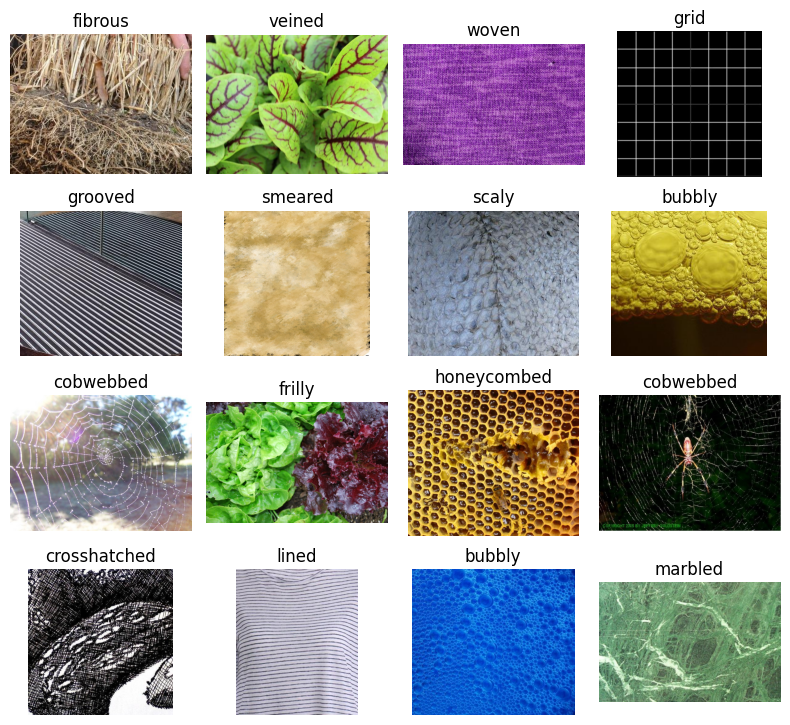

In [12]:
# Fast look at some random images
n = 16

random_indexes = random.sample(range(len(dtd_dataset['train'])), n)
random_elements_ = [dtd_dataset['train'][indx] for indx in random_indexes]

random_elements = [(elem['image'], labels_info[elem['label']]) for elem in random_elements_]
images, labels = zip(*random_elements)
plot_images_with_labels(images, labels, num_cols=4)

### COCO-O

In [13]:
# Download the file following https://github.com/alibaba/easyrobust/tree/main/benchmarks/coco_o
url = 'https://drive.google.com/uc?id=1aBfIJN0zo_i80Hv4p7Ch7M8pRzO37qbq'
zip_file_path = os.path.join(path_data, 'ood_coco.zip')
gdown.download(url, zip_file_path, quiet=False)

# Unzipping the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(path_data)

Downloading...
From (original): https://drive.google.com/uc?id=1aBfIJN0zo_i80Hv4p7Ch7M8pRzO37qbq
From (redirected): https://drive.google.com/uc?id=1aBfIJN0zo_i80Hv4p7Ch7M8pRzO37qbq&confirm=t&uuid=629dd8c9-7c06-45af-94ab-9c5292481704
To: /content/data/ood_coco.zip
100%|██████████| 1.20G/1.20G [00:24<00:00, 48.3MB/s]


<b><font color="red">[TODO]</font></b>: Based on the path of the loaded dataset, display random 16 samples with labels, similar to the CIFAR10 and DTD above.

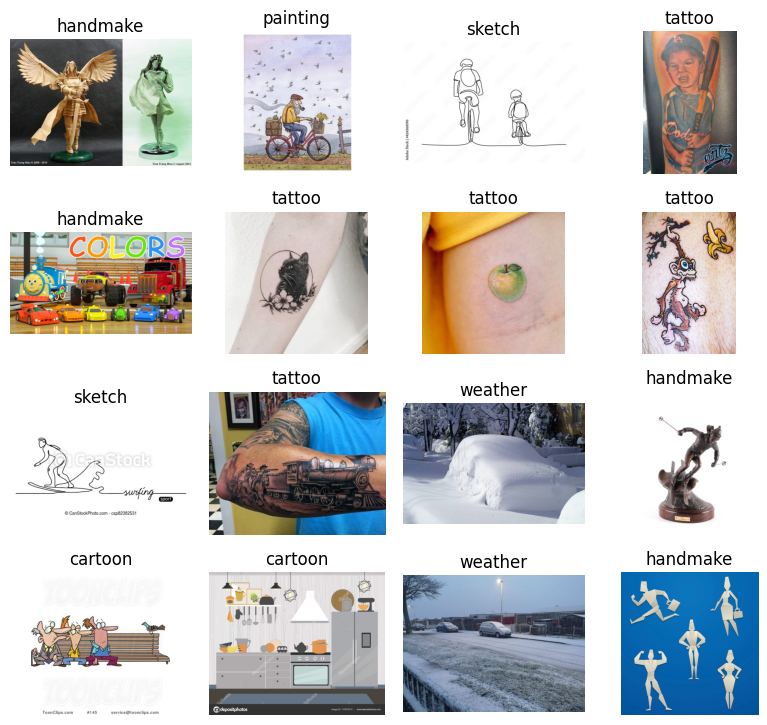

In [23]:
# Fast look at some random images
n = 16

# YOUR CODE HERE
path_data = '/content/data'
coco_o_path = os.path.join(path_data, 'ood_coco')

corruption_types = ['cartoon', 'handmake', 'painting', 'sketch', 'tattoo', 'weather']

images = []
labels = []

for _ in range(n):
    corruption_type = random.choice(corruption_types)
    annotations_file = os.path.join(coco_o_path, corruption_type, 'annotations', 'instances_val2017.json')
    with open(annotations_file, 'r') as f:
        annotations = json.load(f)

    images_dir = os.path.join(coco_o_path, corruption_type, 'val2017')

    categories = {cat['id']: cat['name'] for cat in annotations['categories']}

    img_info = random.choice(annotations['images'])
    img_path = os.path.join(images_dir, img_info['file_name'])
    img = Image.open(img_path)
    images.append(img)
    img_id = img_info['id']
    img_annotations = [ann for ann in annotations['annotations'] if ann['image_id'] == img_id]

    label_names = list(set([categories[ann['category_id']] for ann in img_annotations]))

    labels.append(f"{corruption_type}")

plot_images_with_labels(images, labels, num_cols=4)

## Dataset analysis with fiftyone lib

For more advanced dataset analysis, we will use the [FiftyOne](https://voxel51.com/) library. We will start with the basic functionality of viewing images and ground truth labels. Subsequently, we will also add predictions and extend the analysis to the Object Detection problem in the next assignment. As an example, we will use the COCO-O dataset, and you are encouraged to try applying this to other datasets as well.

In [24]:
# Load all elements
path_coco_o = os.path.join(path_data, 'ood_coco')
all_elements_coco = []
for label in os.listdir(path_coco_o):
    path_label_dir = os.path.join(path_coco_o, label, 'val2017')
    all_elements_coco += [(os.path.join(path_label_dir, img), label) for img in os.listdir(path_label_dir)]

In [25]:
print(len(all_elements_coco))

6782


In [26]:
all_elements_coco[:3]

[('/content/data/ood_coco/weather/val2017/000000000231.jpeg', 'weather'),
 ('/content/data/ood_coco/weather/val2017/000000000834.jpeg', 'weather'),
 ('/content/data/ood_coco/weather/val2017/000000000922.jpeg', 'weather')]

In [27]:
# Load the data into FiftyOne samples
samples = []
for image_path, label in all_elements_coco:
    samples.append(
        fo.Sample(
            filepath=image_path,
            ground_truth=fo.Classification(label=label),
        )
    )

In [28]:
# Set the dataset name
dataset_name = 'coco-o'

# Check and delete existing dataset (this may come in handy if you are trying to recreate the dataset)
if fo.dataset_exists(dataset_name):
    fo.delete_dataset(dataset_name)
    print(f"Dataset '{dataset_name}' has been deleted.")

# Add the samples to a dataset
dataset = fo.Dataset('coco-o')
dataset.add_samples(samples);
print(f"Dataset '{dataset_name}' has been created.")

You are running the oldest supported major version of MongoDB. Please refer to https://deprecation.voxel51.com for deprecation notices. You can suppress this exception by setting your `database_validation` config parameter to `False`. See https://docs.voxel51.com/user_guide/config.html#configuring-a-mongodb-connection for more information


 100% |███████████████| 6782/6782 [2.7s elapsed, 0s remaining, 2.4K samples/s]      


INFO:eta.core.utils: 100% |███████████████| 6782/6782 [2.7s elapsed, 0s remaining, 2.4K samples/s]      


Dataset 'coco-o' has been created.


In [29]:
# Print some information about the dataset
print(dataset)

Name:        coco-o
Media type:  image
Num samples: 6782
Persistent:  False
Tags:        []
Sample fields:
    id:               fiftyone.core.fields.ObjectIdField
    filepath:         fiftyone.core.fields.StringField
    tags:             fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:         fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    created_at:       fiftyone.core.fields.DateTimeField
    last_modified_at: fiftyone.core.fields.DateTimeField
    ground_truth:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Classification)


In [30]:
# Launch the app
session = fo.launch_app();


Welcome to

███████╗██╗███████╗████████╗██╗   ██╗ ██████╗ ███╗   ██╗███████╗
██╔════╝██║██╔════╝╚══██╔══╝╚██╗ ██╔╝██╔═══██╗████╗  ██║██╔════╝
█████╗  ██║█████╗     ██║    ╚████╔╝ ██║   ██║██╔██╗ ██║█████╗
██╔══╝  ██║██╔══╝     ██║     ╚██╔╝  ██║   ██║██║╚██╗██║██╔══╝
██║     ██║██║        ██║      ██║   ╚██████╔╝██║ ╚████║███████╗
╚═╝     ╚═╝╚═╝        ╚═╝      ╚═╝    ╚═════╝ ╚═╝  ╚═══╝╚══════╝ v1.9.0

If you're finding FiftyOne helpful, here's how you can get involved:

|
|  ⭐⭐⭐ Give the project a star on GitHub ⭐⭐⭐
|  https://github.com/voxel51/fiftyone
|
|  🚀🚀🚀 Join the FiftyOne Discord community 🚀🚀🚀
|  https://community.voxel51.com/
|



INFO:fiftyone.core.session.session:
Welcome to

███████╗██╗███████╗████████╗██╗   ██╗ ██████╗ ███╗   ██╗███████╗
██╔════╝██║██╔════╝╚══██╔══╝╚██╗ ██╔╝██╔═══██╗████╗  ██║██╔════╝
█████╗  ██║█████╗     ██║    ╚████╔╝ ██║   ██║██╔██╗ ██║█████╗
██╔══╝  ██║██╔══╝     ██║     ╚██╔╝  ██║   ██║██║╚██╗██║██╔══╝
██║     ██║██║        ██║      ██║   ╚██████╔╝██║ ╚████║███████╗
╚═╝     ╚═╝╚═╝        ╚═╝      ╚═╝    ╚═════╝ ╚═╝  ╚═══╝╚══════╝ v1.9.0

If you're finding FiftyOne helpful, here's how you can get involved:

|
|  ⭐⭐⭐ Give the project a star on GitHub ⭐⭐⭐
|  https://github.com/voxel51/fiftyone
|
|  🚀🚀🚀 Join the FiftyOne Discord community 🚀🚀🚀
|  https://community.voxel51.com/
|



<b><font color="red">[TODO]</font></b>: Explore the fifyone and its functionality.

## Quantitative analysis of data sets

<b><font color="red">[TODO]</font></b>: Analyze either the DTD or COCO-O dataset (or both, if you prefer) and report basic statistics, such as:

* The number of images in each class
* The distribution of image heights and widths
* Any other properties that you think would be beneficial and shed light on the characteristics of the data

In [36]:
all_stats = {
    'category_counts': Counter(),
    'heights': [],
    'widths': [],
    'aspect_ratios': [],
    'objects_per_image': [],
    'corruption_image_counts': {},
    'category_per_corruption': defaultdict(Counter)
}


for corruption_type in corruption_types:
    annotations_file = os.path.join(coco_o_path, corruption_type, 'annotations', 'instances_val2017.json')
    with open(annotations_file, 'r') as f:
        annotations = json.load(f)

    all_stats['corruption_image_counts'][corruption_type] = len(annotations['images'])

    categories = {cat['id']: cat['name'] for cat in annotations['categories']}

    image_annotation_count = Counter()
    for ann in annotations['annotations']:
        img_id = ann['image_id']
        cat_id = ann['category_id']
        image_annotation_count[img_id] += 1
        all_stats['category_counts'][categories[cat_id]] += 1
        all_stats['category_per_corruption'][corruption_type][categories[cat_id]] += 1

    for img_info in annotations['images']:
        width = img_info['width']
        height = img_info['height']
        all_stats['widths'].append(width)
        all_stats['heights'].append(height)
        all_stats['aspect_ratios'].append(width / height)
        all_stats['objects_per_image'].append(image_annotation_count[img_info['id']])

print("\n1. IMAGES PER CORRUPTION TYPE:")
for corruption_type, count in all_stats['corruption_image_counts'].items():
    print(f"   {corruption_type:12s}: {count:,} images")
print(f"   {'TOTAL':12s}: {sum(all_stats['corruption_image_counts'].values()):,} images")

print(f"\n2. CATEGORY STATISTICS:")
print(f"   Total unique categories: {len(all_stats['category_counts'])}")
print(f"   Total object instances: {sum(all_stats['category_counts'].values()):,}")
print(f"\n   Top 15 most common categories:")
for category, count in all_stats['category_counts'].most_common(15):
    print(f"   {category:20s}: {count:,} instances")

print(f"\n3. IMAGE DIMENSIONS:")
print(f"   Width  - Mean: {np.mean(all_stats['widths']):.1f}, Std: {np.std(all_stats['widths']):.1f}")
print(f"            Min: {np.min(all_stats['widths'])}, Max: {np.max(all_stats['widths'])}")
print(f"   Height - Mean: {np.mean(all_stats['heights']):.1f}, Std: {np.std(all_stats['heights']):.1f}")
print(f"            Min: {np.min(all_stats['heights'])}, Max: {np.max(all_stats['heights'])}")

print(f"\n4. ASPECT RATIOS:")
print(f"   Mean: {np.mean(all_stats['aspect_ratios']):.2f}")
print(f"   Median: {np.median(all_stats['aspect_ratios']):.2f}")
print(f"   Range: {np.min(all_stats['aspect_ratios']):.2f} to {np.max(all_stats['aspect_ratios']):.2f}")

print(f"\n5. OBJECTS PER IMAGE:")
print(f"   Mean: {np.mean(all_stats['objects_per_image']):.1f}")
print(f"   Median: {np.median(all_stats['objects_per_image']):.1f}")
print(f"   Min: {np.min(all_stats['objects_per_image'])}, Max: {np.max(all_stats['objects_per_image'])}")



1. IMAGES PER CORRUPTION TYPE:
   cartoon     : 1,996 images
   handmake    : 961 images
   painting    : 954 images
   sketch      : 992 images
   tattoo      : 918 images
   weather     : 961 images
   TOTAL       : 6,782 images

2. CATEGORY STATISTICS:
   Total unique categories: 80
   Total object instances: 26,624

   Top 15 most common categories:
   person              : 5,884 instances
   car                 : 2,472 instances
   chair               : 919 instances
   traffic light       : 763 instances
   cup                 : 747 instances
   bottle              : 657 instances
   book                : 595 instances
   bird                : 552 instances
   potted plant        : 540 instances
   dog                 : 504 instances
   boat                : 461 instances
   umbrella            : 426 instances
   truck               : 425 instances
   dining table        : 362 instances
   apple               : 358 instances

3. IMAGE DIMENSIONS:
   Width  - Mean: 957.6, Std: 64

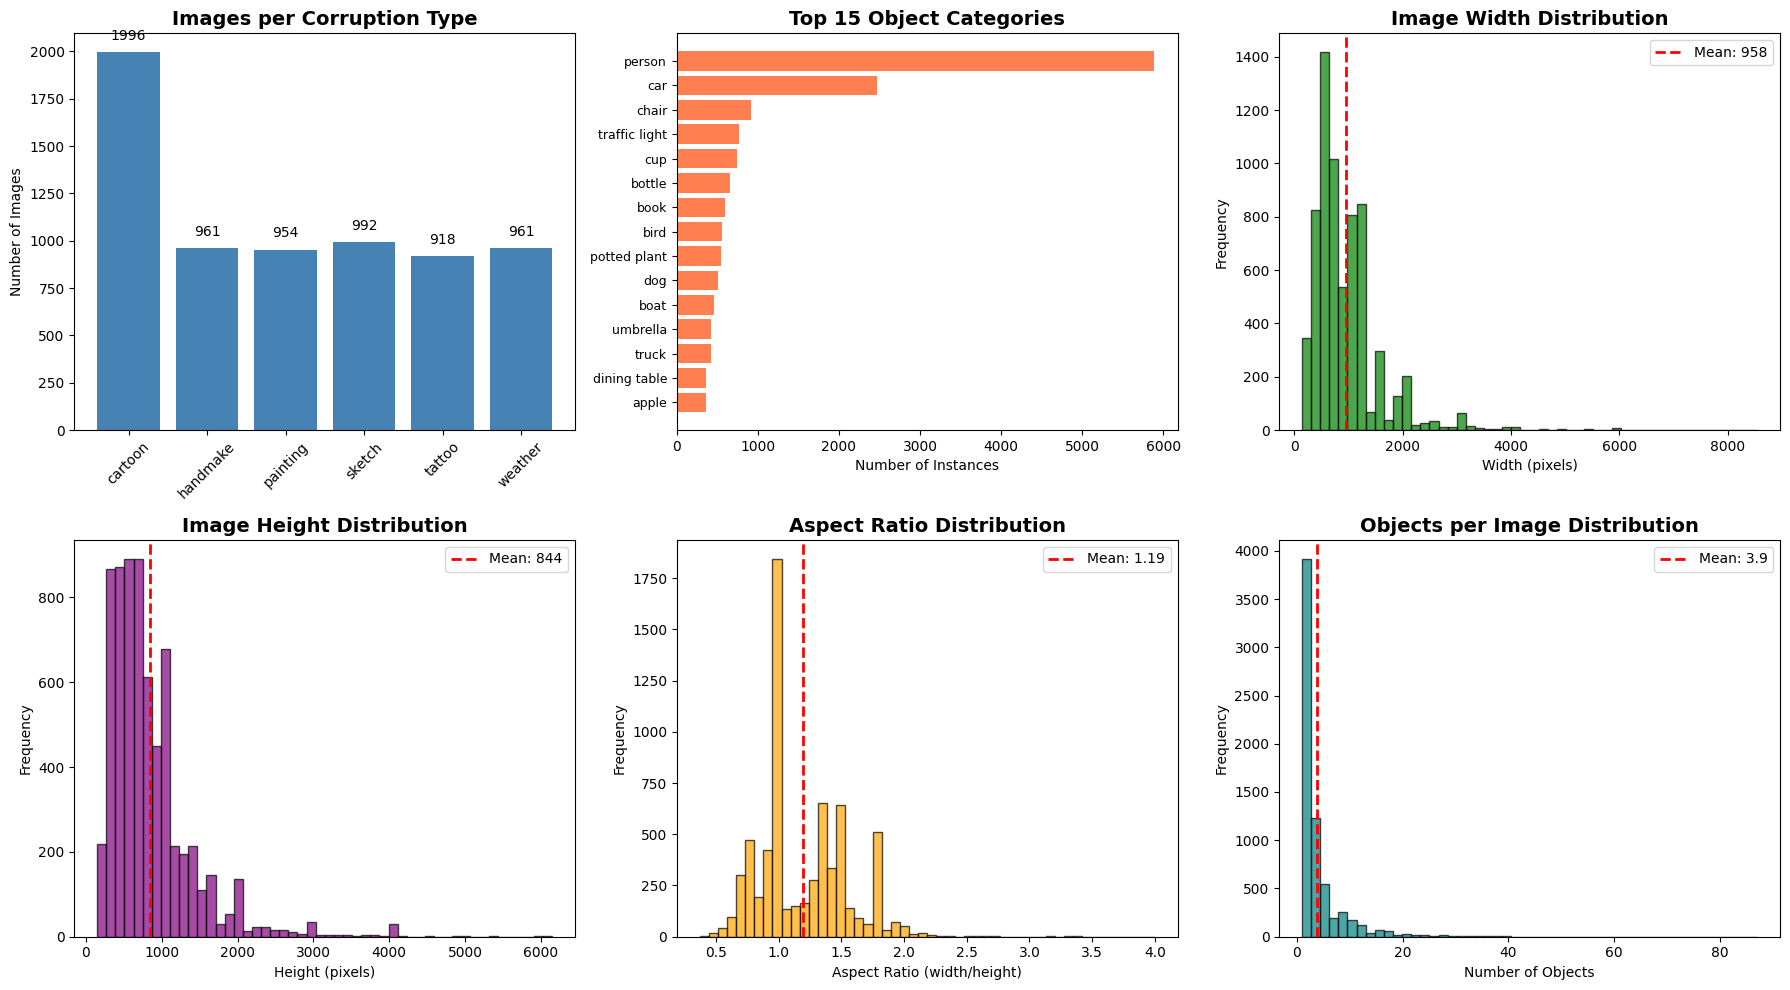

In [38]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

ax = axes[0, 0]
corruption_names = list(all_stats['corruption_image_counts'].keys())
corruption_counts = list(all_stats['corruption_image_counts'].values())
ax.bar(corruption_names, corruption_counts, color='steelblue')
ax.set_title('Images per Corruption Type', fontsize=14, fontweight='bold')
ax.set_ylabel('Number of Images')
ax.tick_params(axis='x', rotation=45)
for i, v in enumerate(corruption_counts):
    ax.text(i, v + 50, str(v), ha='center', va='bottom')

ax = axes[0, 1]
top_categories = all_stats['category_counts'].most_common(15)
cat_names, cat_counts = zip(*top_categories)
ax.barh(range(len(cat_names)), cat_counts, color='coral')
ax.set_yticks(range(len(cat_names)))
ax.set_yticklabels(cat_names, fontsize=9)
ax.set_title('Top 15 Object Categories', fontsize=14, fontweight='bold')
ax.set_xlabel('Number of Instances')
ax.invert_yaxis()

ax = axes[0, 2]
ax.hist(all_stats['widths'], bins=50, color='green', alpha=0.7, edgecolor='black')
ax.set_title('Image Width Distribution', fontsize=14, fontweight='bold')
ax.set_xlabel('Width (pixels)')
ax.set_ylabel('Frequency')
ax.axvline(np.mean(all_stats['widths']), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(all_stats["widths"]):.0f}')
ax.legend()

ax = axes[1, 0]
ax.hist(all_stats['heights'], bins=50, color='purple', alpha=0.7, edgecolor='black')
ax.set_title('Image Height Distribution', fontsize=14, fontweight='bold')
ax.set_xlabel('Height (pixels)')
ax.set_ylabel('Frequency')
ax.axvline(np.mean(all_stats['heights']), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(all_stats["heights"]):.0f}')
ax.legend()

ax = axes[1, 1]
ax.hist(all_stats['aspect_ratios'], bins=50, color='orange', alpha=0.7, edgecolor='black')
ax.set_title('Aspect Ratio Distribution', fontsize=14, fontweight='bold')
ax.set_xlabel('Aspect Ratio (width/height)')
ax.set_ylabel('Frequency')
ax.axvline(np.mean(all_stats['aspect_ratios']), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(all_stats["aspect_ratios"]):.2f}')
ax.legend()

ax = axes[1, 2]
ax.hist(all_stats['objects_per_image'], bins=50, color='teal', alpha=0.7, edgecolor='black')
ax.set_title('Objects per Image Distribution', fontsize=14, fontweight='bold')
ax.set_xlabel('Number of Objects')
ax.set_ylabel('Frequency')
ax.axvline(np.mean(all_stats['objects_per_image']), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(all_stats["objects_per_image"]):.1f}')
ax.legend()

plt.tight_layout()
plt.show()

In [39]:
print("\n6. CATEGORY CONSISTENCY ACROSS CORRUPTIONS:")
print("   (Do all corruption types have similar category distributions?)")
sample_categories = ['person', 'car', 'chair', 'dog', 'cat']
for cat in sample_categories:
    if cat in all_stats['category_counts']:
        print(f"\n   {cat}:")
        for corruption in corruption_types:
            count = all_stats['category_per_corruption'][corruption][cat]
            print(f"      {corruption:12s}: {count:,} instances")


6. CATEGORY CONSISTENCY ACROSS CORRUPTIONS:
   (Do all corruption types have similar category distributions?)

   person:
      cartoon     : 1,850 instances
      handmake    : 523 instances
      painting    : 1,330 instances
      sketch      : 1,143 instances
      tattoo      : 157 instances
      weather     : 881 instances

   car:
      cartoon     : 300 instances
      handmake    : 134 instances
      painting    : 348 instances
      sketch      : 131 instances
      tattoo      : 27 instances
      weather     : 1,532 instances

   chair:
      cartoon     : 374 instances
      handmake    : 140 instances
      painting    : 222 instances
      sketch      : 169 instances
      tattoo      : 7 instances
      weather     : 7 instances

   dog:
      cartoon     : 224 instances
      handmake    : 86 instances
      painting    : 86 instances
      sketch      : 42 instances
      tattoo      : 42 instances
      weather     : 24 instances

   cat:
      cartoon     : 106 i